In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

In [39]:
#DIRECTORY FOR LAB CLASSROOM
#data_folder1 = '/Users/cgrunow/Desktop/lsa-ast361/Work/cgrunow/radio-astronomy/sun_azimuth/'
#data_folder2 = '/Users/cgrunow/Desktop/lsa-ast361/Work/cgrunow/radio-astronomy/sun_elevation/'

#DIRECTORY FOR ASTRO LOUNGE
#data_folder1 = '/Users/cgrunow/Desktop/cgrunow/radio-astronomy/sun_azimuth/'
#data_folder2 = '/Users/cgrunow/Desktop/cgrunow/radio-astronomy/sun_elevation/'

# DIRECTORY FOR LAPTOP
data_folder1 = '/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth/'
data_folder2 = '/Users/cg100/Downloads/Astro361/radio-astronomy/sun_elevation/'

az_files = glob.glob(data_folder1 + "sun*") #This command grabs all of the files starting with "sun_az" in your data folder.
el_files = glob.glob(data_folder2 + "sun_el*")
az_files.sort() #Notably, the "glob" function does NOT sort the list it creates, so we do that here with the "sort" command
el_files.sort()

#Find the order of the files 
for file in az_files:
    print(file)

for file in el_files:
    print(file)

/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun-1_0.dat
/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun-2_0.dat
/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun-3_0.dat
/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun-4_0.dat
/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun-5_0.dat
/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun-6_0.dat
/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun-7_0.dat
/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun-8_0.dat
/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun-9_0.dat
/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun0_0.dat
/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun10_0.dat
/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun1_0.dat
/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun2_0.dat
/Users/cg100/Downloads/Astro361/radio-astronomy/sun_azimuth\sun3_0.

In [40]:
az_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for az_file in az_files: #Pull each individual filename from the list of azimuth files
    
    with open(az_file) as az_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(az_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        az_spectra.append(tot_spectrum)


In [41]:
el_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for el_file in el_files: #Pull each individual filename from the list of azimuth files
    
    with open(el_file) as el_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(el_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        el_spectra.append(tot_spectrum)

In [42]:
# Shows the Azimuth 

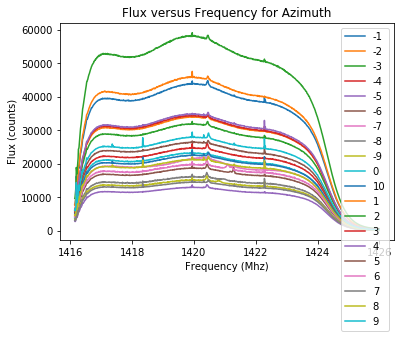

In [43]:
# Makes an array of the frequency range and step
frequency = np.arange(1416,1426, 0.009766)

# Matches up each of the spectra to their azimuth labels
#for i in range(0,4):
#    plt.plot(frequency[15:],az_spectra[i][15:], label = -i-1)
plt.plot(frequency[15:],az_spectra[0][15:], label = -1)
plt.plot(frequency[15:],az_spectra[1][15:], label = -2)
plt.plot(frequency[15:],az_spectra[2][15:], label = -3)
plt.plot(frequency[15:],az_spectra[3][15:], label = -4)
plt.plot(frequency[15:],az_spectra[4][15:], label = -5)
plt.plot(frequency[15:],az_spectra[5][15:], label = -6)
plt.plot(frequency[15:],az_spectra[6][15:], label = -7)
plt.plot(frequency[15:],az_spectra[7][15:], label = -8)
plt.plot(frequency[15:],az_spectra[8][15:], label = -9)
plt.plot(frequency[15:],az_spectra[9][15:], label = 0)
plt.plot(frequency[15:],az_spectra[10][15:], label = 10)
plt.plot(frequency[15:],az_spectra[11][15:], label = 1)
plt.plot(frequency[15:],az_spectra[12][15:], label = 2)
plt.plot(frequency[15:],az_spectra[13][15:], label = 3)
plt.plot(frequency[15:],az_spectra[14][15:], label = 4)
plt.plot(frequency[15:],az_spectra[15][15:], label = 5)
plt.plot(frequency[15:],az_spectra[16][15:], label = 6)
plt.plot(frequency[15:],az_spectra[17][15:], label = 7)
plt.plot(frequency[15:],az_spectra[18][15:], label = 8)
plt.plot(frequency[15:],az_spectra[19][15:], label = 9)


plt.title('Flux versus Frequency for Azimuth')
plt.xlabel('Frequency (Mhz)')
plt.ylabel('Flux (counts)')
plt.legend()
plt.show()

In [44]:
# Elevation

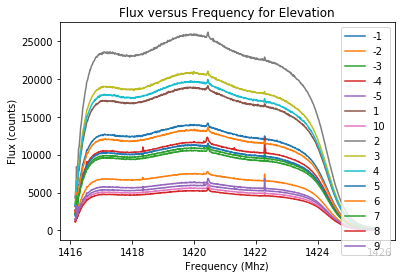

In [45]:
frequency = np.arange(1416,1426, 0.009766)

# Matches up each of the spectra to their elevation labels
plt.plot(frequency[15:], el_spectra[0][15:], label = -1)
plt.plot(frequency[15:], el_spectra[1][15:], label = -2)
plt.plot(frequency[15:], el_spectra[2][15:], label = -3)
plt.plot(frequency[15:], el_spectra[3][15:], label = -4)
plt.plot(frequency[15:], el_spectra[4][15:], label = -5)
plt.plot(frequency[15:], el_spectra[5][15:], label = 1)
plt.plot(frequency[15:], el_spectra[6][15:], label = 10)
plt.plot(frequency[15:], el_spectra[7][15:], label = 2)
plt.plot(frequency[15:], el_spectra[8][15:], label = 3)
plt.plot(frequency[15:], el_spectra[9][15:], label = 4)
plt.plot(frequency[15:], el_spectra[10][15:], label = 5)
plt.plot(frequency[15:], el_spectra[11][15:], label = 6)
plt.plot(frequency[15:], el_spectra[12][15:], label = 7)
plt.plot(frequency[15:], el_spectra[13][15:], label = 8)
plt.plot(frequency[15:], el_spectra[14][15:], label = 9)
    
plt.title('Flux versus Frequency for Elevation')
plt.xlabel('Frequency (Mhz)')
plt.ylabel('Flux (counts)')
plt.legend()
plt.show()

elevation = [-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9]

[316608.62528451 245275.98296013 229960.42673562 179014.08252243
  94248.54038096 135992.55723943 143886.91774908 117216.1251488
 110208.36067042 166830.12288448 163991.30942025 330112.4464528
 418662.27065801 247475.97022446 251561.15270952 190856.71245715
 153222.40024118 105629.64345799 154549.27595686 203141.46070645]


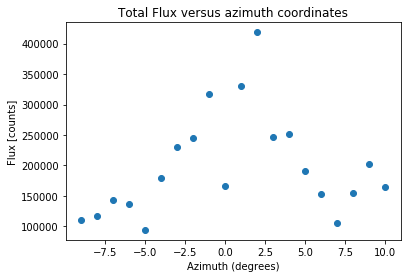

In [46]:
azimuth = [-1,-2,-3,-4,-5,-6,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9]
az_spectra = np.asarray(az_spectra)


azimuthflux = np.trapz(az_spectra, frequency)
    
   
plt.scatter(azimuth, azimuthflux)
plt.title('Total Flux versus azimuth coordinates')
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Flux [counts]')
plt.plot()
print(azimuthflux)

[100099.93568597  54183.38104966  78723.55365859  84545.02566127
  43217.22294399 135643.01216214  40509.12020198 186078.07964834
 149727.14084775 141317.76021541  81032.39283705  95382.10068046
  76228.46142009  37964.89343519  46027.70183389]


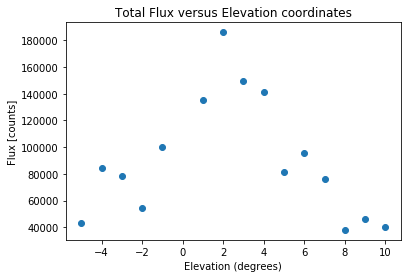

In [47]:
elevation = [-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9] # puts elevation in correct order


elevationflux = np.trapz(el_spectra, frequency)
    
   
plt.scatter(elevation, elevationflux)

plt.title('Total Flux versus Elevation coordinates')
plt.xlabel('Elevation (degrees)')
plt.ylabel('Flux [counts]')
plt.plot()
print(elevationflux)

In [48]:
# Fitting scatter plots to a Gaussian

In [49]:
#Defines the Gaussian function for Azimuth
#Variables a= standard deviation, b= mean, and c= amplitude 
def GaussA(x,a,b,c):
    return (c/(a*(2*np.pi)**0.5))*np.exp((-0.5)*((x-b)/a)**2)

# Initial Estimates for Azimuth
a0,b0,c0 = (4,0,35000)
x = np.array(azimuth)
y = azimuthflux
coeffs, fiterr = curve_fit(GaussA, x, y, p0=(a0,b0,c0))

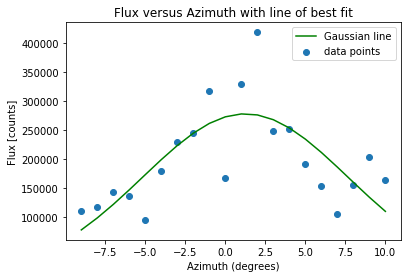

('Full Width Half Max of Total Flux vs Azimuth=', 15.113601106652203)
6.417665013440426
1.247699996361126
4471549.721158038


In [50]:
plt.scatter(x,y, label = 'data points')
plt.plot(np.sort(x),GaussA(np.sort(x),coeffs[0], coeffs[1], coeffs[2]), 'g', label = 'Gaussian line')
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Flux [counts]')
plt.title('Flux versus Azimuth with line of best fit')
plt.legend()
plt.show()

fwhm1=2.355*coeffs[0]

print('Full Width Half Max of Total Flux vs Azimuth=',fwhm1)
print(coeffs[0])
print(coeffs[1])
print(coeffs[2])

In [51]:
#Defines the Gaussian function
#Variables a= standard deviation, b= mean, and c= amplitude 
def GaussE(x,a,b,c):
    return (c/(a*(2*np.pi)**0.5))*np.exp((-0.5)*((x-b)/a)**2)

# Initial Estimates for Elevation
a0,b0,c0 = (4,0,160000)
x2 = np.array(elevation)
y2 = elevationflux
coeffs, fiterr = curve_fit(GaussE, x2, y2, p0=(a0,b0,c0))

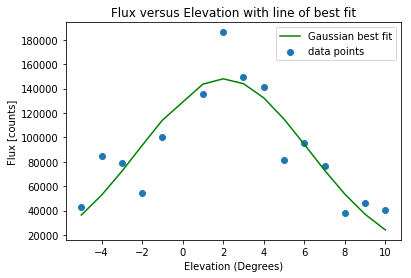

('Full Width Half Max of Total Flux vs Elevation=', 9.871817203755894)
4.191854438962163
2.021397531036272
1554367.8344493303


In [52]:
plt.scatter(x2,y2, label = 'data points')
plt.plot(np.sort(x2),GaussE(np.sort(x2),coeffs[0], coeffs[1], coeffs[2]), 'g', label = 'Gaussian best fit')
plt.xlabel('Elevation (Degrees)')
plt.ylabel('Flux [counts]')
plt.title('Flux versus Elevation with line of best fit')
plt.legend()
plt.show()

fwhm2=2.355*coeffs[0]

print('Full Width Half Max of Total Flux vs Elevation=', fwhm2)
print(coeffs[0])
print(coeffs[1])
print(coeffs[2])